# (0) Import Libraries & Load Dataset

In [ ]:
pip install datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.3 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm
import pickle
from matplotlib import pyplot as plt

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import squarify
from pprint import pprint as pp
import squarify


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import list_datasets
datasets_list = list_datasets()
print(len(datasets_list))


27208


In [ ]:
from datasets import load_dataset
dataset = load_dataset('wmt16', 'de-en')

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

#(1) Visualizing the datset

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 4548885
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2169
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2999
    })
})

Extract train data

In [ ]:
len(dataset['train'])

4548885

In [ ]:
print(dataset['train'][0])
print(dataset['train'][1])

{'translation': {'de': 'Wiederaufnahme der Sitzungsperiode', 'en': 'Resumption of the session'}}
{'translation': {'de': 'Ich erkläre die am Freitag, dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen, wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe, daß Sie schöne Ferien hatten.', 'en': 'I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.'}}


In [ ]:
print(dataset['train'][0]['translation']['de'])
print(dataset['train'][0]['translation']['en'])

Wiederaufnahme der Sitzungsperiode
Resumption of the session


In [ ]:
dataset_train=dataset['train']
print(len(dataset_train))

print(dataset_train[0]['translation']['de'])
print(dataset_train[0]['translation']['en'])

4548885
Wiederaufnahme der Sitzungsperiode
Resumption of the session


## Shuffling & Slicing the Train data

In [ ]:
dataset_train_shuffled = dataset_train.shuffle(seed=42)
print(len(dataset_train_shuffled))

4548885


In [ ]:
type(dataset_train_shuffled)

datasets.arrow_dataset.Dataset

In [ ]:
dataset_train_1_percent=dataset_train[:45500] #1% slicing
print(len(dataset_train_1_percent['translation']))
dataset_train_1_percent

45500


{'translation': [{'de': 'Wiederaufnahme der Sitzungsperiode',
   'en': 'Resumption of the session'},
  {'de': 'Ich erkläre die am Freitag, dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen, wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe, daß Sie schöne Ferien hatten.',
   'en': 'I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.'},
  {'de': 'Wie Sie feststellen konnten, ist der gefürchtete "Millenium-Bug " nicht eingetreten. Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden.',
   'en': "Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful."},
  {'de': 'Im Parlament besteht der Wunsch na

In [ ]:
dataset_train_1_percent['translation'][0]

{'de': 'Wiederaufnahme der Sitzungsperiode', 'en': 'Resumption of the session'}

In [ ]:
train_raw_German=[]
train_raw_English=[]

for i in tqdm(range(0,len(dataset_train_1_percent['translation']))): 
   train_raw_German.append(dataset_train_1_percent['translation'][i]['de'])
   train_raw_English.append(dataset_train_1_percent['translation'][i]['en']) 
   

# print(train_raw_English)
# train_raw_German

100%|██████████| 45500/45500 [00:00<00:00, 275888.79it/s]


In [ ]:
print(train_raw_English[:10])
print(train_raw_German[:10])

['Resumption of the session', 'I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.', "Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful.", 'You have requested a debate on this subject in the course of the next few days, during this part-session.', "In the meantime, I should like to observe a minute' s silence, as a number of Members have requested, on behalf of all the victims concerned, particularly those of the terrible storms, in the various countries of the European Union.", "Please rise, then, for this minute' s silence.", "(The House rose and observed a minute' s silence)", 'Madam President, on a point of order.', 'You will be aware from the press and television that there have been a num

In [ ]:
# train_raw_German=[]
# train_raw_English=[]
# for i in tqdm(range(0,len(dataset['train']))): 
#    train_raw_German.append(dataset['train'][i]['translation']['de'])
#    train_raw_English.append(dataset['train'][i]['translation']['en']) 
   
#len(dataset['train'])
# print(train_raw_English)
# train_raw_German

100%|██████████| 4548885/4548885 [10:56<00:00, 6925.75it/s]


##Pickle dump the extracted data
For faster loading

In [ ]:
# # /content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/train_raw_German.pkl


# with open('train_raw_German.pkl', 'wb') as f:
#     pickle.dump(train_raw_German, f)

# with open('train_raw_English.pkl', 'wb') as g:
#     pickle.dump(train_raw_English, g)

In [ ]:
# dump 1% of data to new location

with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/train_raw_German.pkl', 'wb') as f:
    pickle.dump(train_raw_German, f)

with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/train_raw_English.pkl', 'wb') as g:
    pickle.dump(train_raw_English, g)

**Load Train Data**

In [ ]:
with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/train_raw_German.pkl', 'rb') as f:
    train_raw_German = pickle.load(f)

with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/train_raw_English.pkl', 'rb') as f:
    train_raw_English = pickle.load(f)

Extract test data

In [ ]:
test_raw_German=[]
test_raw_English=[]
for i in tqdm(range(0,len(dataset['test']))): 
   test_raw_German.append(dataset['test'][i]['translation']['de'])
   test_raw_English.append(dataset['test'][i]['translation']['en']) 
   
with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/test_raw_German.pkl', 'wb') as f:
    pickle.dump(test_raw_German, f)

with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/test_raw_English.pkl', 'wb') as g:
    pickle.dump(test_raw_English, g)

100%|██████████| 2999/2999 [00:00<00:00, 6995.12it/s]


**Load test data**

In [ ]:
with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/test_raw_German.pkl', 'rb') as f:
    test_raw_German=pickle.load(f)

with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/test_raw_English.pkl', 'rb') as g:
    test_raw_English=pickle.load(g)

In [ ]:
len(test_raw_German)

2999

In [ ]:
len(test_raw_English)

2999

Extract validation data

In [ ]:
validation_raw_German=[]
validation_raw_English=[]
for i in tqdm(range(0,len(dataset['validation']))): 
   validation_raw_German.append(dataset['validation'][i]['translation']['de'])
   validation_raw_English.append(dataset['validation'][i]['translation']['en']) 
   
#len(dataset['train'])
# print(train_raw_English)
# train_raw_German
with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/validation_raw_German.pkl', 'wb') as f:
    pickle.dump(validation_raw_German, f)

with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/validation_raw_English.pkl', 'wb') as g:
    pickle.dump(validation_raw_English, g)

100%|██████████| 2169/2169 [00:00<00:00, 7761.19it/s]


**Load Validation data**

In [ ]:
with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/validation_raw_German.pkl', 'rb') as f:
    validation_raw_German=pickle.load(f)

with open('/content/drive/MyDrive/2 Sem/DL/Assignments/A3_BharatGoyal_DebnathKundu_SaloniAgrawal/Q2/Pickle Files - New/validation_raw_English.pkl', 'rb') as g:
    validation_raw_English=pickle.load(g)

In [ ]:
print(len(validation_raw_German))
len(validation_raw_English)

2169


2169

##i. Sequence Length

In [ ]:
total_sequences=len(train_raw_English)

# List of data points
German_sequence_length_list=[]
English_sequence_length_list=[]
sequence_number=[]

for i in tqdm(range(0,total_sequences)):
    sequence_number.append(i)

    contents=train_raw_German[i].split()
    German_sequence_length_list.append(len(contents))

    contents=train_raw_English[i].split()
    English_sequence_length_list.append(len(contents))

# # Plot bar chart with data points
# plt.bar(data, data)

# # Display the plot
# plt.show()

100%|██████████| 45500/45500 [00:00<00:00, 72481.75it/s]


In [ ]:
print(German_sequence_length_list[:100])
print(English_sequence_length_list[:100])
print(sequence_number[:100])

[3, 29, 22, 16, 33, 9, 7, 4, 20, 31, 54, 12, 14, 4, 14, 20, 35, 13, 24, 36, 21, 36, 22, 58, 10, 9, 14, 19, 7, 25, 17, 50, 42, 17, 31, 8, 44, 17, 18, 9, 20, 15, 11, 12, 5, 13, 9, 16, 16, 28, 24, 24, 12, 32, 6, 15, 12, 50, 17, 15, 11, 11, 7, 5, 13, 11, 1, 30, 8, 2, 27, 15, 10, 51, 35, 51, 22, 22, 54, 11, 53, 103, 70, 92, 20, 3, 31, 17, 14, 7, 11, 10, 4, 15, 7, 16, 34, 5, 4, 8]
[4, 38, 31, 19, 40, 8, 9, 7, 23, 25, 49, 18, 12, 7, 10, 18, 39, 13, 28, 34, 27, 47, 21, 69, 13, 9, 14, 21, 7, 28, 17, 57, 54, 21, 40, 10, 47, 17, 20, 10, 22, 16, 12, 18, 6, 10, 6, 15, 17, 32, 25, 22, 12, 28, 8, 12, 16, 52, 14, 15, 13, 10, 13, 7, 13, 19, 1, 37, 10, 3, 32, 23, 15, 56, 36, 46, 27, 26, 48, 12, 50, 105, 62, 97, 26, 5, 30, 14, 18, 7, 10, 11, 7, 16, 7, 17, 39, 9, 4, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 

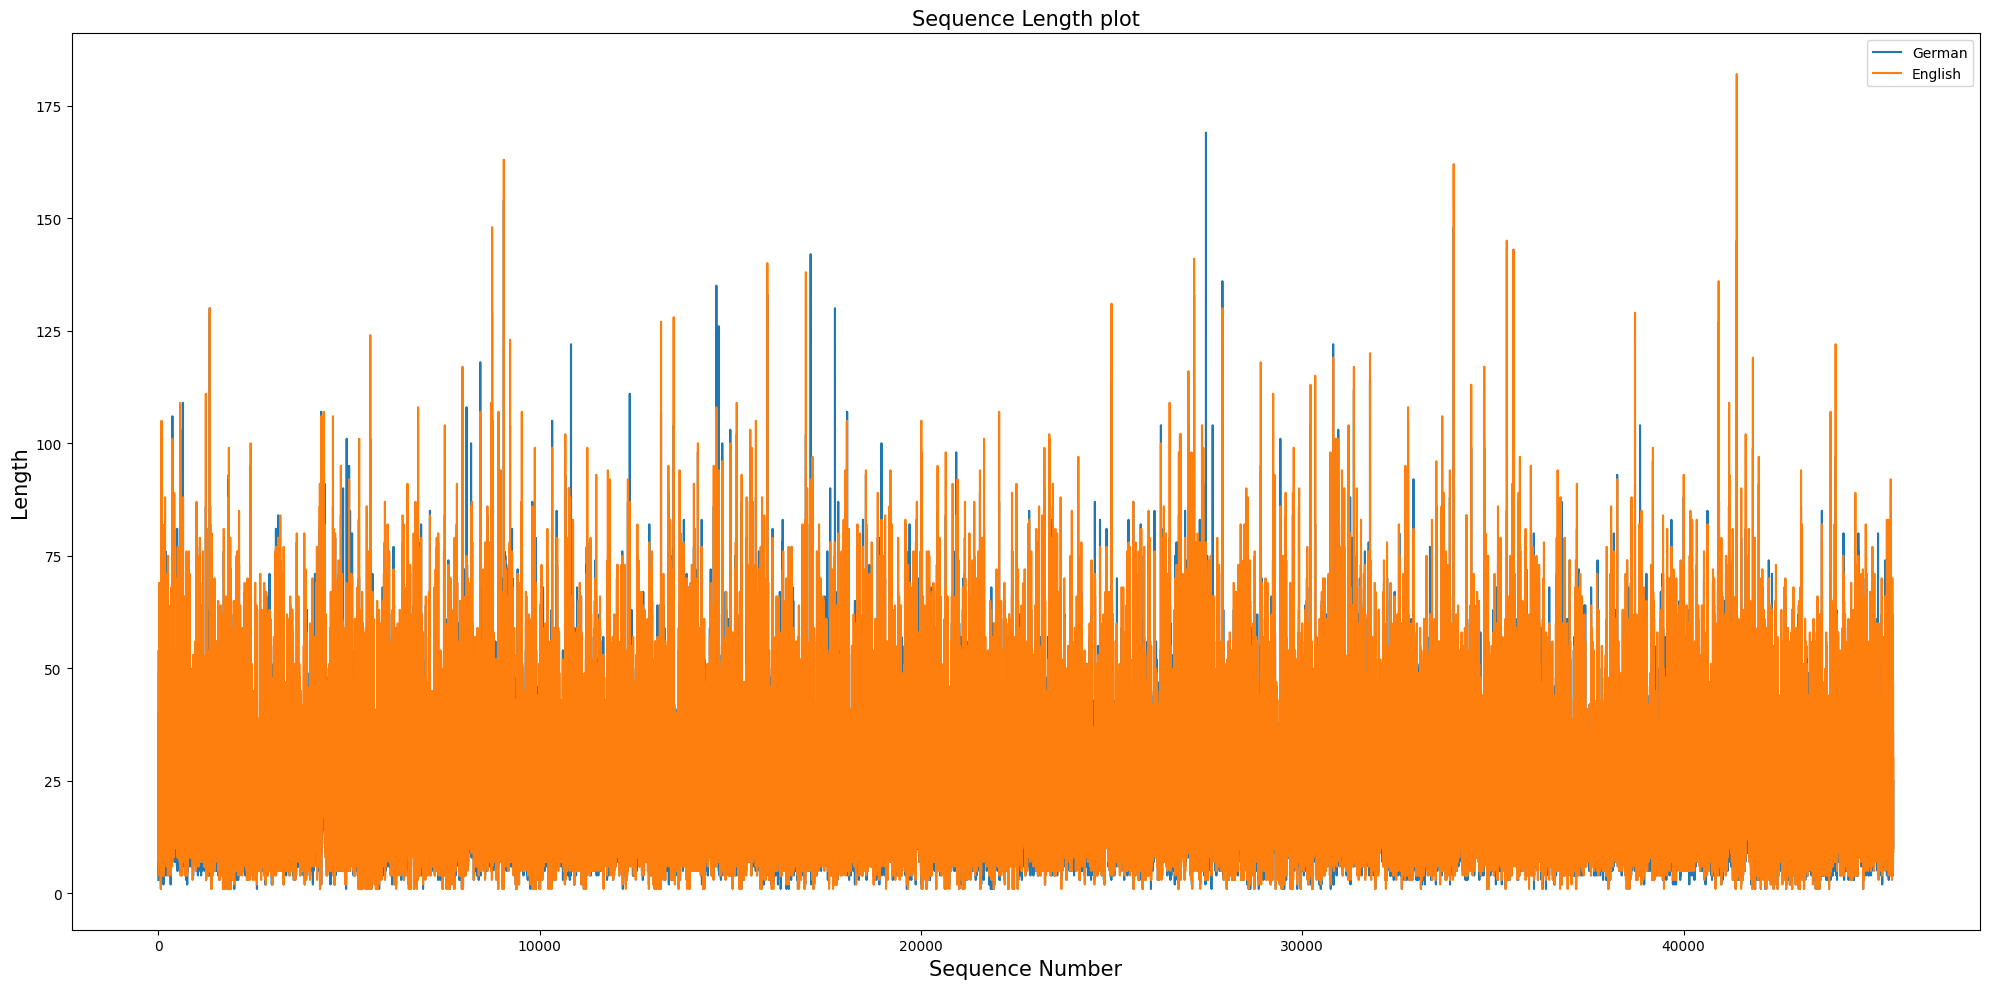

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [20.00, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

ax.plot(sequence_number, German_sequence_length_list)
ax.plot(sequence_number, English_sequence_length_list)
plt.xlabel('Sequence Number',fontsize=15)
plt.ylabel('Length',fontsize=15)
plt.title('Sequence Length plot',fontsize=15)
plt.legend(['German','English'])
plt.show()

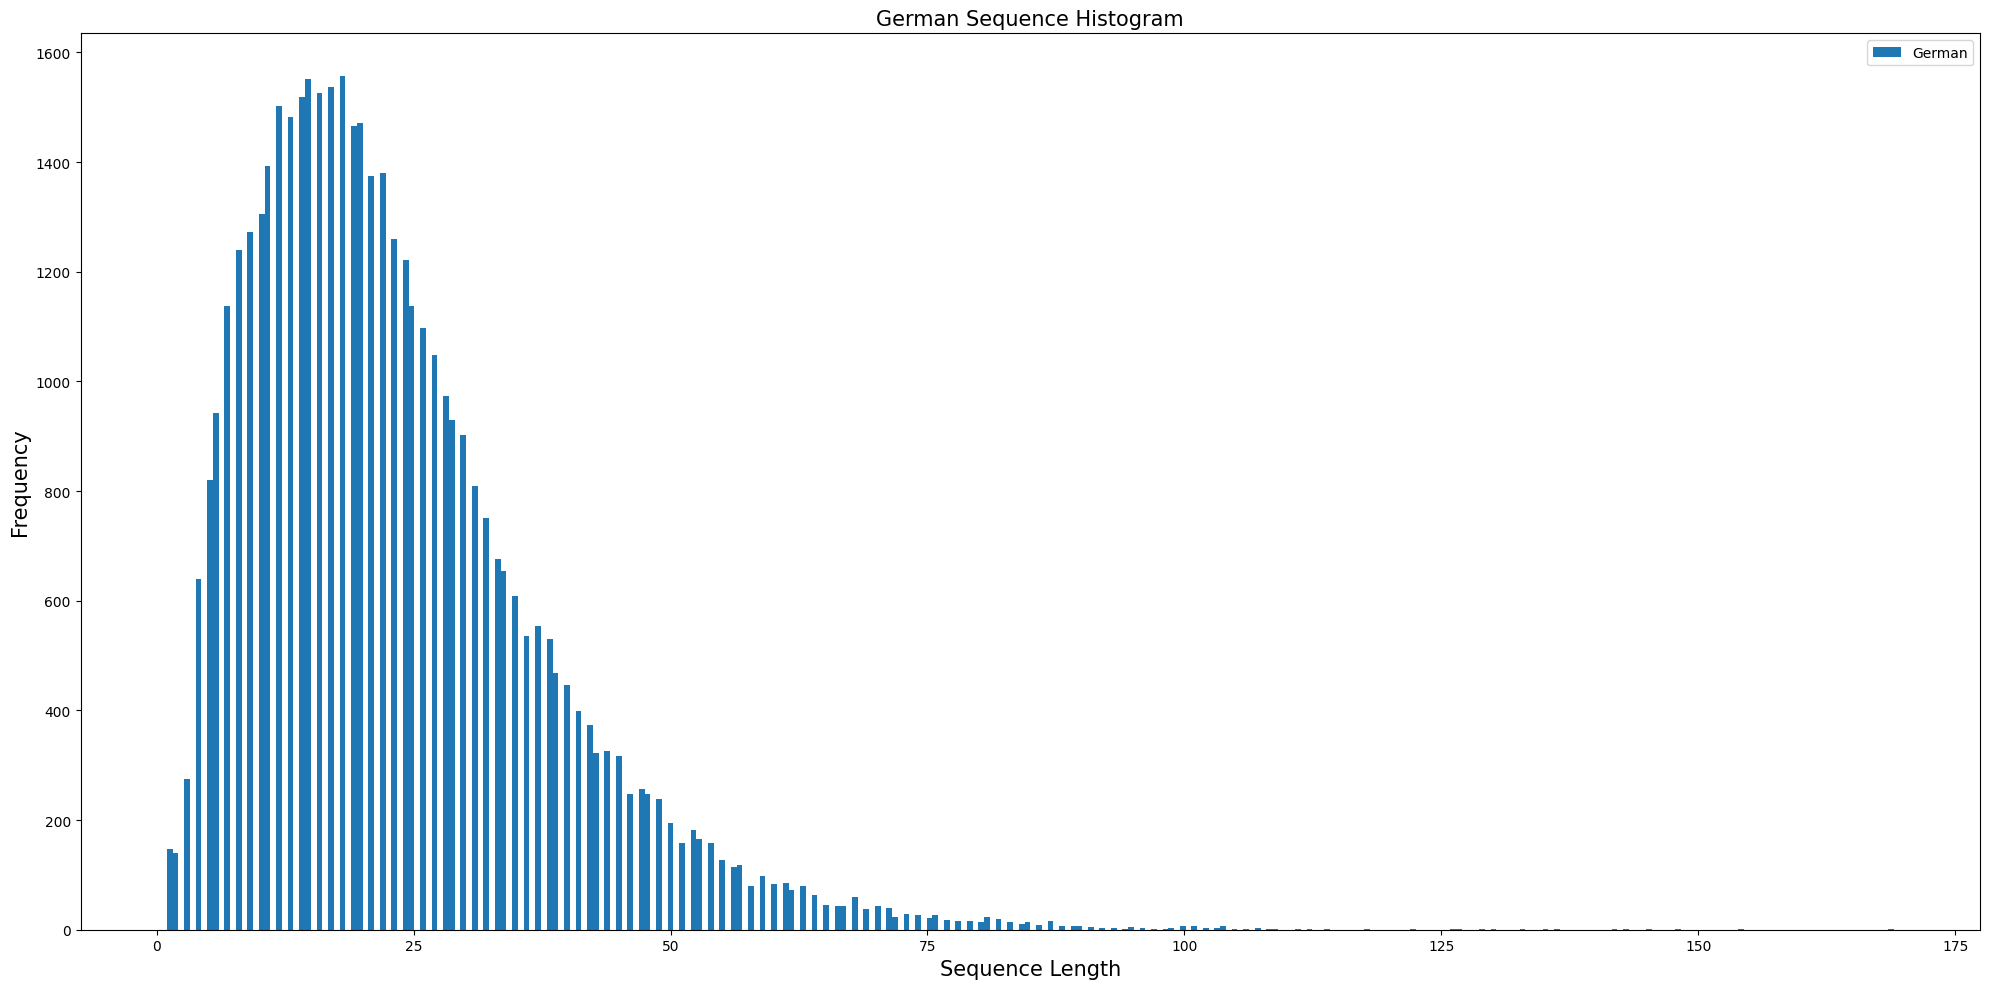

In [ ]:
plt.hist(German_sequence_length_list, bins=300)
plt.xlabel('Sequence Length',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('German Sequence Histogram',fontsize=15)
plt.legend(['German'])
plt.show()

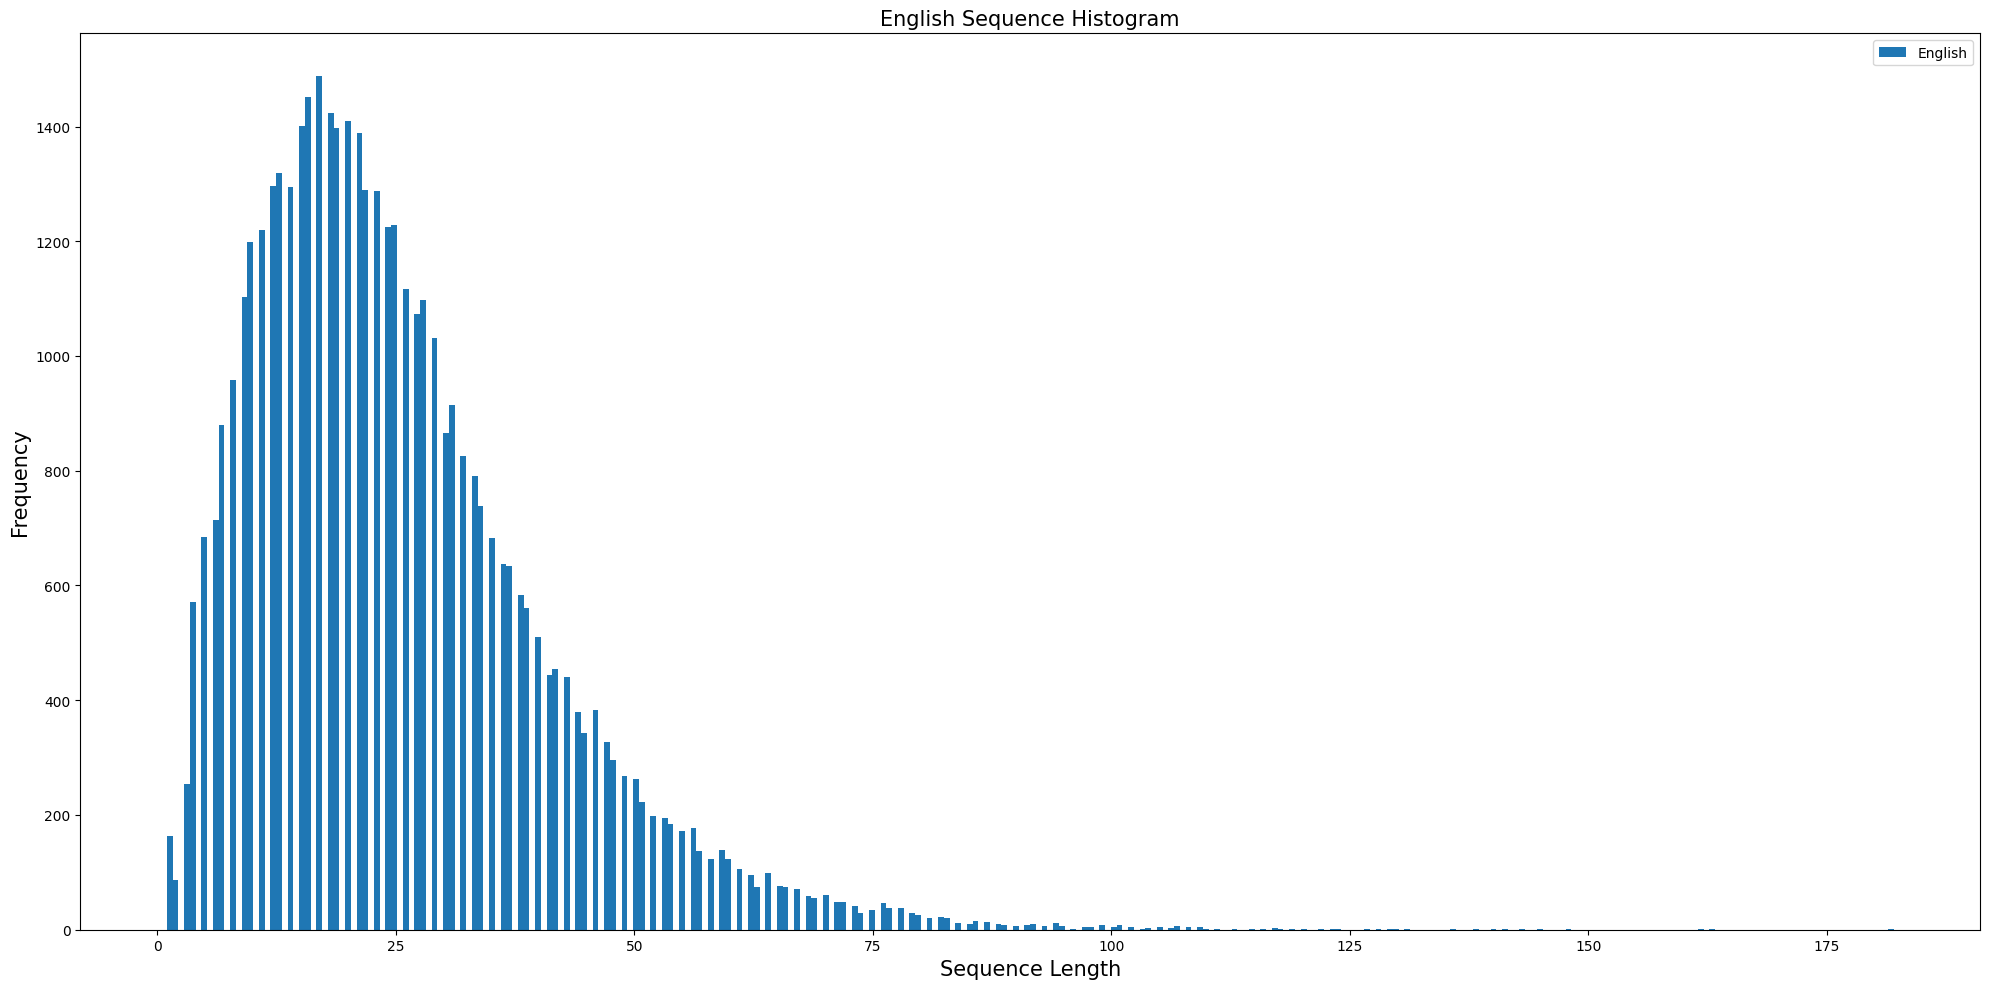

In [ ]:
plt.hist(English_sequence_length_list, bins=300)
plt.xlabel('Sequence Length',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('English Sequence Histogram',fontsize=15)
plt.legend(['English'])
plt.show()

##ii. Frequency of words

**Generating German Vocabulary**

In [ ]:
# raw_German_All
# raw_English_All

raw_German_vocab={}

#iterating through each file in directory
for i in tqdm(range(0,total_sequences)):
  
  li=list(set(train_raw_German[i].split()))

  #print(li)
  for term in li:
      if term in raw_German_vocab:
        raw_German_vocab[term]+=1
        #inverted_index[term][0]+=1
      else:
        raw_German_vocab[term]=1
        #raw_German_vocab.update({term: 1})


100%|██████████| 45500/45500 [00:00<00:00, 101698.30it/s]


In [ ]:
print(len(raw_German_vocab))

70476


In [ ]:
raw_German_vocab

{'Wiederaufnahme': 30,
 'Sitzungsperiode': 47,
 'der': 22701,
 'nochmals': 131,
 'daß': 10215,
 'schöne': 10,
 'Jahreswechsel': 2,
 'Freitag,': 6,
 'dem': 4876,
 'und': 20111,
 'die': 24631,
 'Europäischen': 2576,
 'wünsche': 47,
 'Ich': 4560,
 '17.': 9,
 'des': 6843,
 'am': 961,
 'alles': 274,
 'für': 8706,
 'Sie': 2464,
 'hoffe,': 270,
 'Gute': 6,
 'erkläre': 20,
 'Dezember': 98,
 'Ihnen': 643,
 'zum': 2065,
 'Parlaments': 743,
 'wiederaufgenommen,': 1,
 'unterbrochene': 9,
 'hatten.': 47,
 'Ferien': 3,
 'ist': 6992,
 'Mitgliedstaaten': 1362,
 'Wie': 570,
 'unserer': 881,
 'feststellen': 39,
 'Naturkatastrophen': 27,
 'Bürger': 612,
 'sind': 2577,
 'schrecklichen': 22,
 'konnten,': 23,
 'eingetreten.': 5,
 'geworden.': 33,
 '"Millenium-Bug': 1,
 'von': 9179,
 'Opfer': 112,
 'gefürchtete': 2,
 'nicht': 7907,
 'Doch': 270,
 'einiger': 136,
 '"': 683,
 'in': 13863,
 'besteht': 396,
 'Wunsch': 67,
 'einer': 3103,
 'Tagen.': 2,
 'Verlauf': 39,
 'Parlament': 1972,
 'Aussprache': 460,
 'die

In [ ]:
df_raw_German_vocab=pd.DataFrame(raw_German_vocab.items(),columns=['term','frequency'])
display(df_raw_German_vocab)

,term,frequency
0,Wiederaufnahme,30
1,Sitzungsperiode,47
2,der,22701
3,für,8706
4,des,6843
...,...,...
70471,Ernennungsverfahren,1
70472,Geister.,1
70473,Schwiegermutter,1
70474,überraschte,1


**Generating English Vocabulary**

In [ ]:

raw_English_vocab={}

#iterating through each file in directory
for i in tqdm(range(0,total_sequences)):
  
  li=list(set(train_raw_English[i].split()))

  #print(li)
  for term in li:
      if term in raw_English_vocab:
        raw_English_vocab[term]+=1
        
      else:
        raw_English_vocab[term]=1
        


100%|██████████| 45500/45500 [00:00<00:00, 93954.81it/s]


In [ ]:
print(len(raw_English_vocab))

42361


In [ ]:
raw_English_vocab

{'session': 72,
 'Resumption': 9,
 'the': 33612,
 'of': 24226,
 'on': 8541,
 'would': 3857,
 'again': 409,
 'period.': 41,
 'Parliament': 1833,
 'year': 374,
 'I': 10379,
 'that': 13802,
 'once': 358,
 'pleasant': 4,
 'festive': 2,
 'wish': 371,
 'declare': 38,
 'to': 24268,
 'and': 20443,
 'in': 18159,
 '1999,': 99,
 '17': 40,
 'you': 2207,
 'a': 14906,
 'like': 2333,
 'resumed': 37,
 'new': 1487,
 'enjoyed': 15,
 'happy': 89,
 'Friday': 27,
 'hope': 645,
 'European': 5295,
 'December': 80,
 'adjourned': 14,
 "'millennium": 1,
 'number': 646,
 'disasters': 57,
 'seen,': 6,
 'countries': 1116,
 'as': 5905,
 'still': 718,
 "bug'": 1,
 'Although,': 2,
 'dreaded': 1,
 'truly': 78,
 'materialise,': 2,
 'have': 7107,
 'will': 5105,
 'natural': 134,
 'suffered': 47,
 'failed': 68,
 'people': 1170,
 'series': 80,
 'dreadful.': 1,
 'were': 1034,
 'subject': 327,
 'during': 401,
 'few': 495,
 'next': 490,
 'days,': 34,
 'You': 289,
 'requested': 53,
 'part-session.': 12,
 'course': 299,
 'this'

In [ ]:
df_raw_English_vocab=pd.DataFrame(raw_English_vocab.items(),columns=['term','frequency'])
display(df_raw_English_vocab)

,term,frequency
0,Resumption,9
1,session,72
2,the,33612
3,of,24226
4,happy,89
...,...,...
42356,"spokesperson,",1
42357,"wife,",1
42358,decisive.,1
42359,diverge,1


In [ ]:
df_raw_English_vocab_sorted = df_raw_English_vocab.sort_values('frequency', ascending=False)
df_raw_English_vocab_sorted

,term,frequency
2,the,33612
9,to,24268
3,of,24226
24,and,20443
6,in,18159
...,...,...
25330,envied,1
25328,magnets,1
25326,aspect?,1
25324,culminated,1


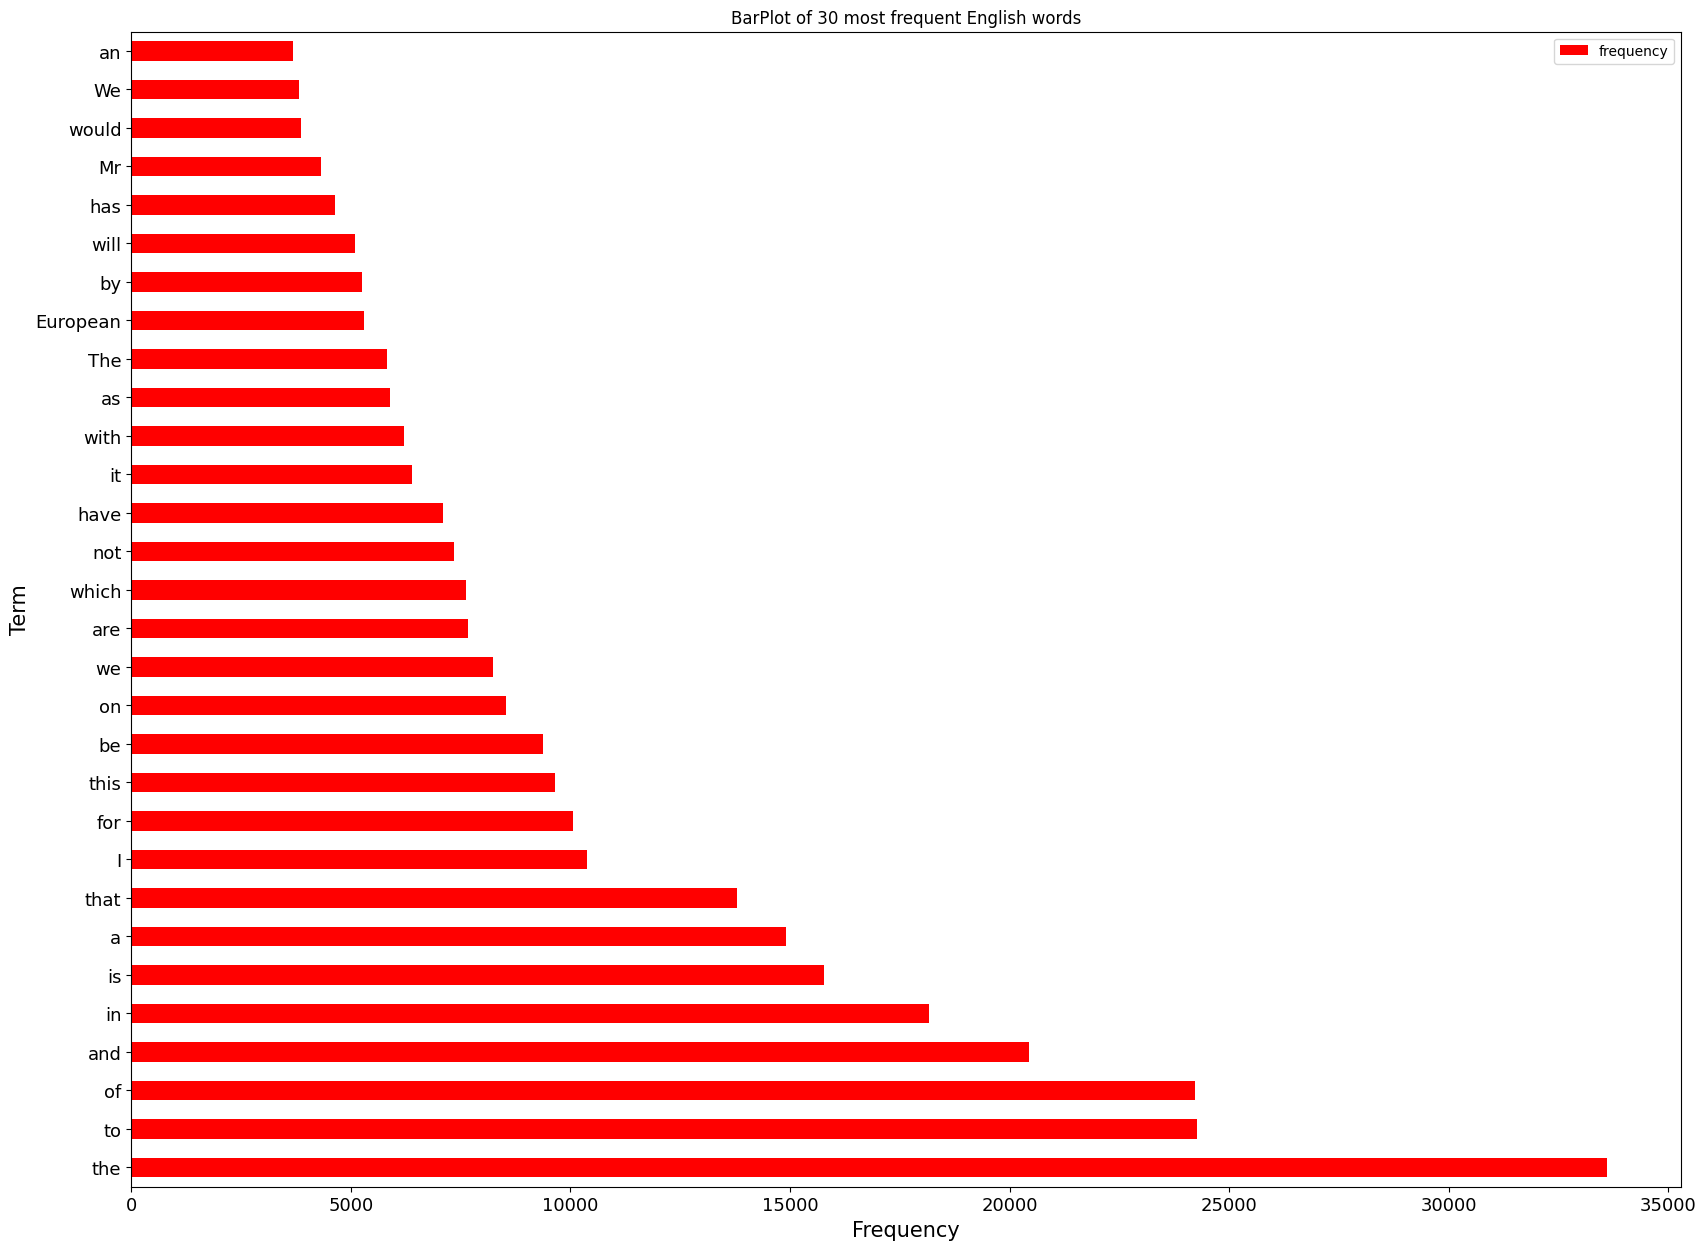

In [ ]:

# bar plot
df_raw_English_vocab_sorted[:30].plot(kind='barh',
        x='term',
        y='frequency',
        color='red',fontsize=13)

plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Term',fontsize=15)

plt.rcParams["figure.figsize"] = [20.00, 15]
# set the title
plt.title('BarPlot of 30 most frequent English words')
 
# show the plot
plt.show()

In [ ]:
df_raw_German_vocab_sorted = df_raw_German_vocab.sort_values('frequency', ascending=False)
df_raw_German_vocab_sorted

,term,frequency
27,die,24631
2,der,22701
10,und,20111
59,in,13863
84,zu,10930
...,...,...
38828,Haupthindernis,1
38829,Fremdenverkehrssektor,1
38830,"Strategieentwicklung,",1
38831,"Taschengeld,",1


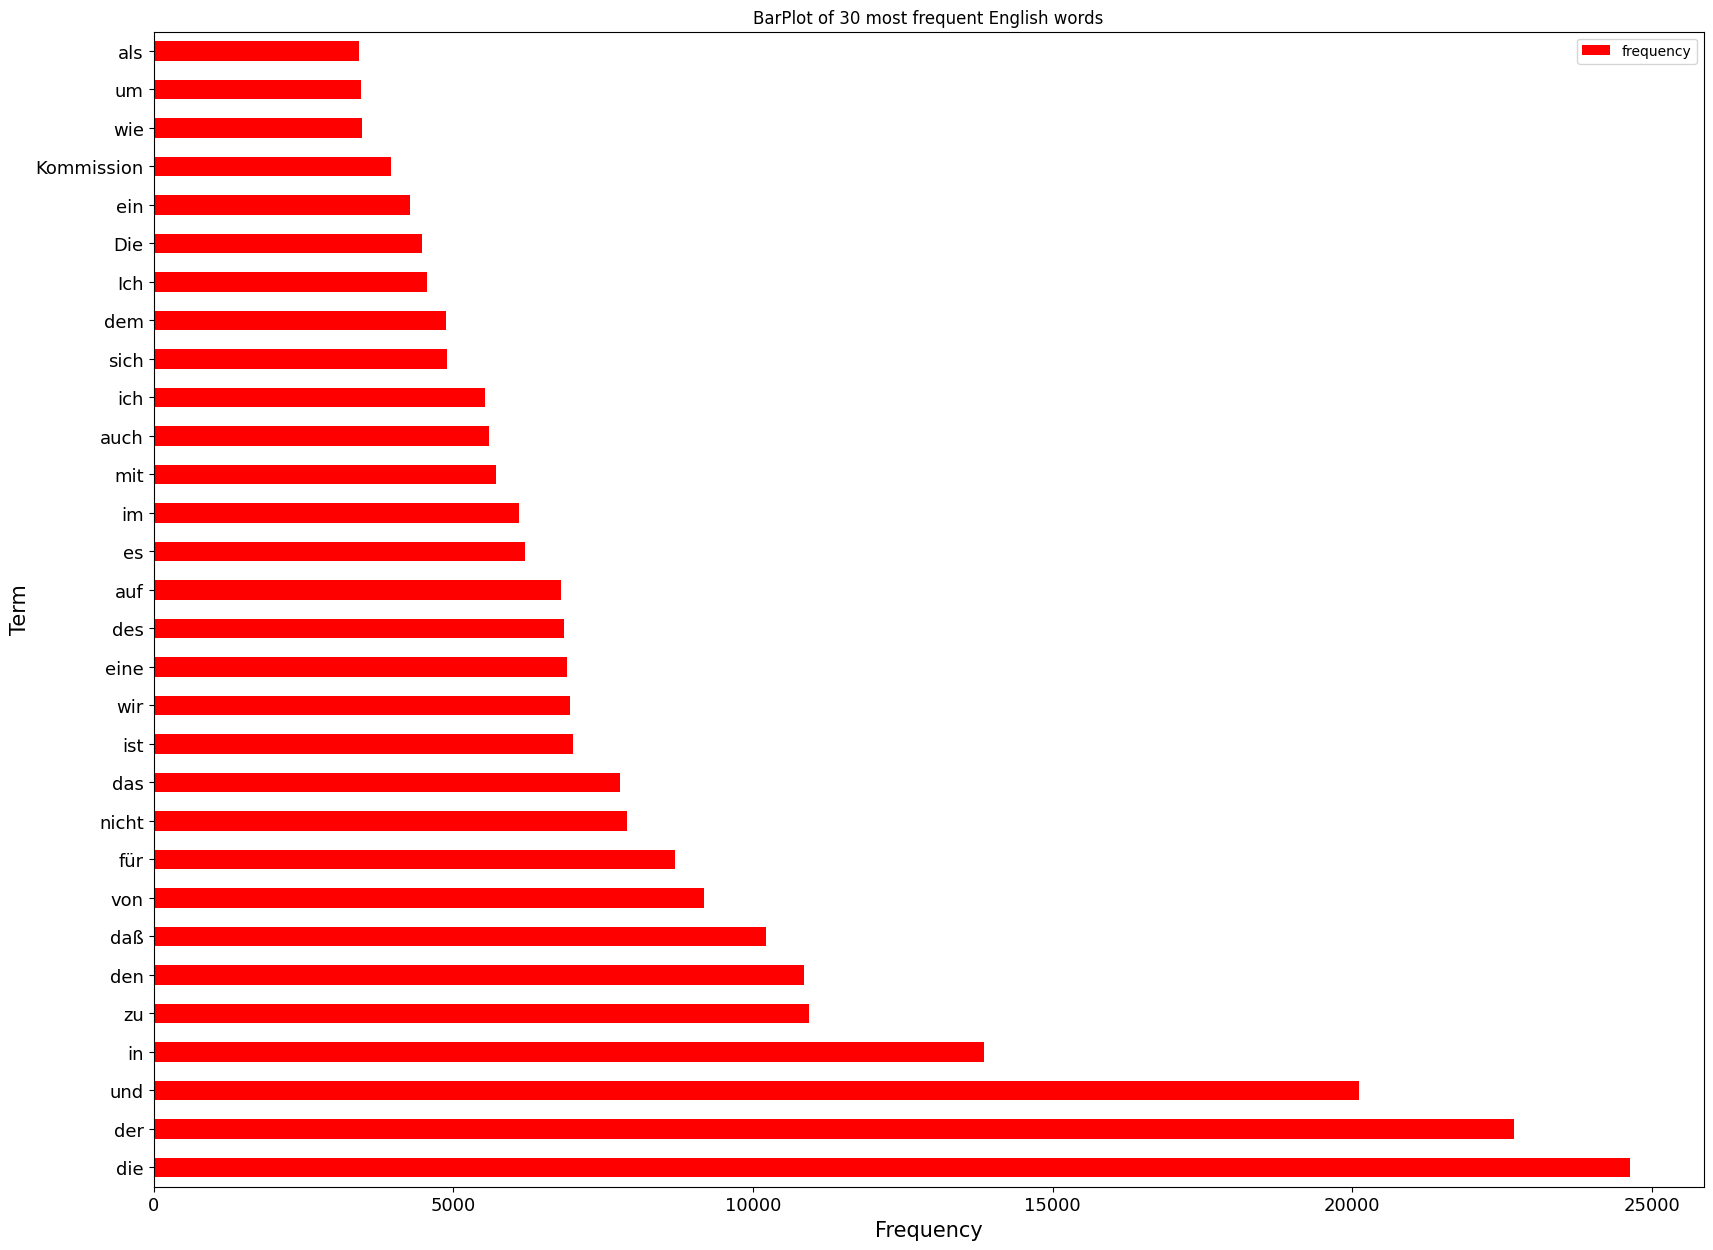

In [ ]:

# bar plot
df_raw_German_vocab_sorted[:30].plot(kind='barh',
        x='term',
        y='frequency',
        color='red',fontsize=13)

plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Term',fontsize=15)

plt.rcParams["figure.figsize"] = [20.00, 15]
# set the title
plt.title('BarPlot of 30 most frequent English words')
 
# show the plot
plt.show()

## iii. Mean token length

In [ ]:
total_sequences=len(train_raw_English)

# List of data points
German_sequence_mean_token_length_list=[]
English_sequence_mean_token_length_list=[]
sequence_number=[]

for i in tqdm(range(0,total_sequences)):
    sequence_number.append(i)

    contents=train_raw_German[i].split()
    # Average String lengths in list
    # using list comprehension + sum() + len()
    temp = [len(ele) for ele in contents]
    res = 0 if len(temp) == 0 else (float(sum(temp)) / len(temp))
    German_sequence_mean_token_length_list.append(res)


    contents=train_raw_English[i].split()
    # Average String lengths in list
    # using list comprehension + sum() + len()
    temp = [len(ele) for ele in contents]
    res = 0 if len(temp) == 0 else (float(sum(temp)) / len(temp))
    English_sequence_mean_token_length_list.append(res)

print(German_sequence_mean_token_length_list[:100])
print(English_sequence_mean_token_length_list[:100])
print(sequence_number[:100])

100%|██████████| 45500/45500 [00:00<00:00, 129890.41it/s]

[10.666666666666666, 6.551724137931035, 7.454545454545454, 5.9375, 5.606060606060606, 5.222222222222222, 6.571428571428571, 9.0, 5.25, 5.483870967741935, 5.62962962962963, 5.833333333333333, 5.214285714285714, 9.0, 5.5, 5.4, 6.457142857142857, 6.538461538461538, 7.333333333333333, 5.0, 5.0476190476190474, 6.25, 6.318181818181818, 6.086206896551724, 5.9, 4.444444444444445, 4.785714285714286, 5.421052631578948, 4.714285714285714, 5.8, 4.705882352941177, 5.76, 5.761904761904762, 5.705882352941177, 5.838709677419355, 7.25, 6.090909090909091, 6.0588235294117645, 5.722222222222222, 4.888888888888889, 6.2, 5.733333333333333, 7.090909090909091, 7.666666666666667, 8.8, 5.615384615384615, 7.0, 4.75, 4.4375, 5.678571428571429, 6.916666666666667, 6.0, 5.166666666666667, 5.96875, 5.5, 4.333333333333333, 5.166666666666667, 6.46, 6.117647058823529, 6.333333333333333, 8.0, 6.0, 6.285714285714286, 5.4, 6.923076923076923, 6.818181818181818, 11.0, 6.0, 5.5, 6.0, 6.888888888888889, 5.666666666666667, 5.6,

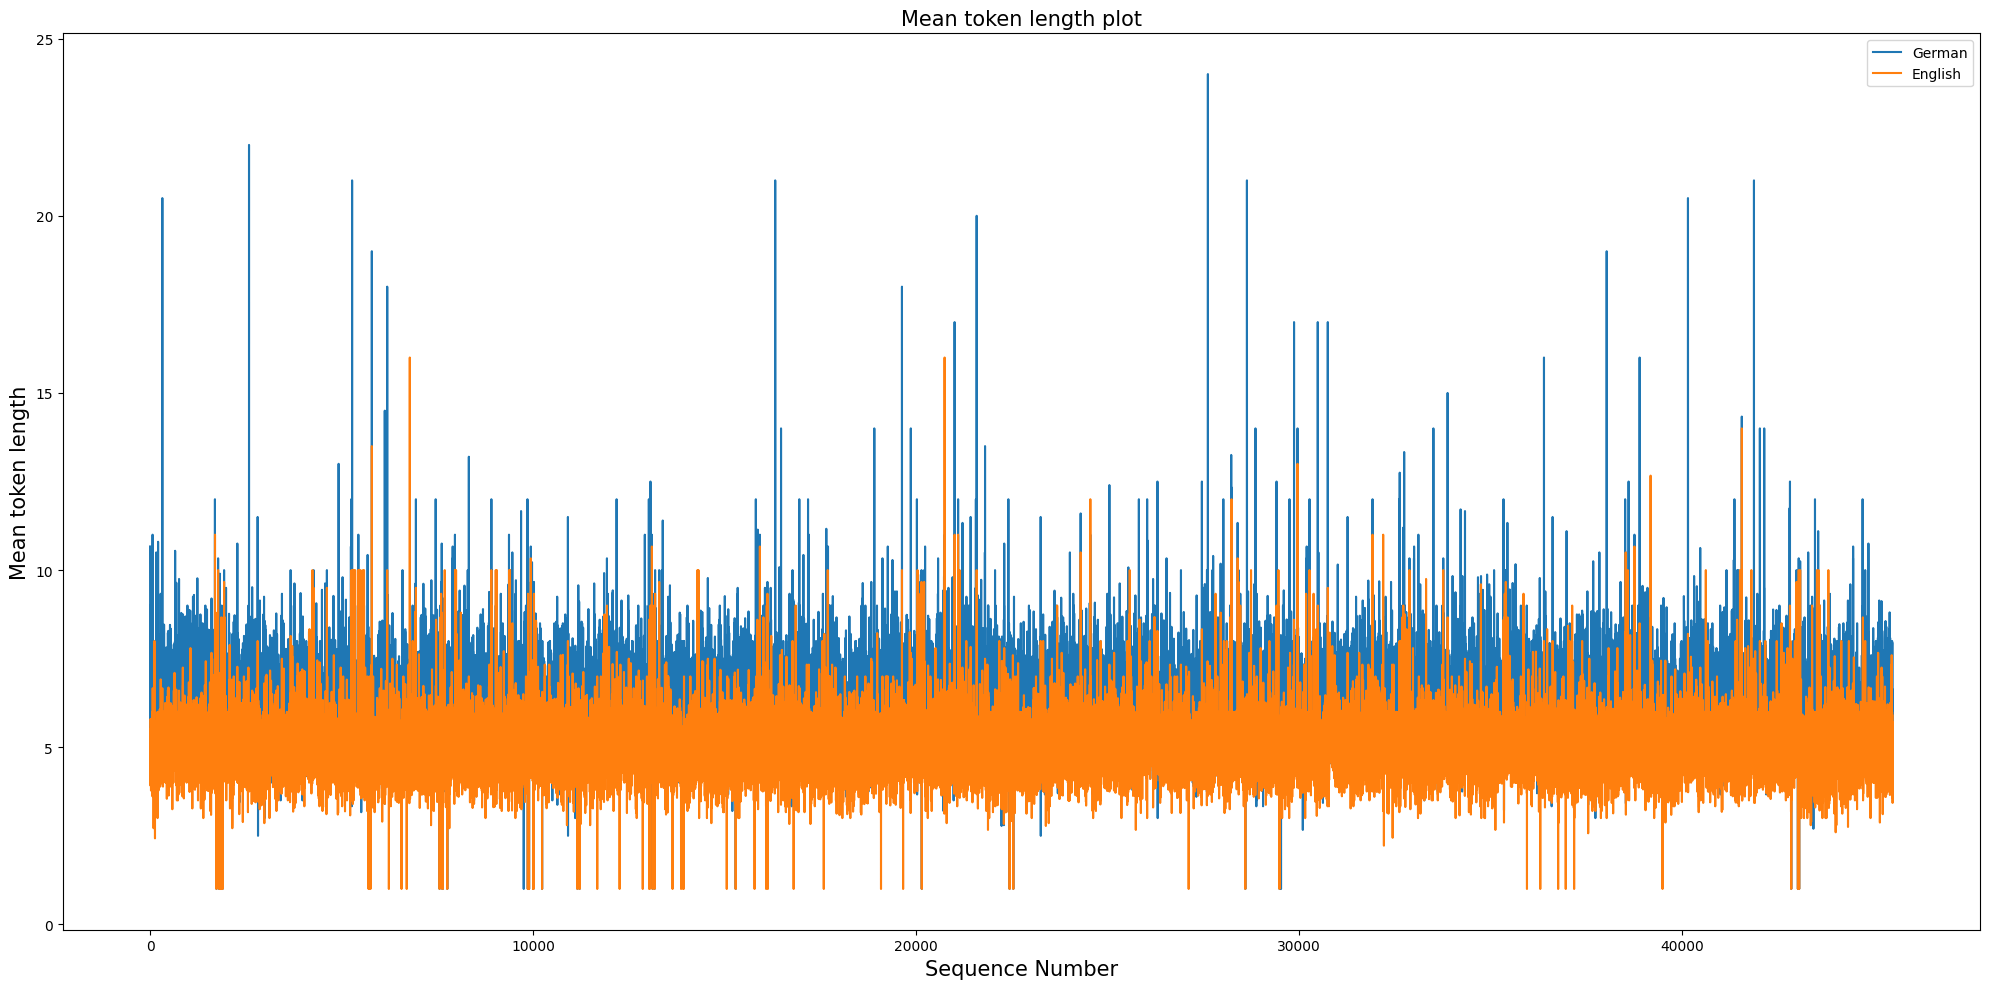

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [20.00, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

ax.plot(sequence_number, German_sequence_mean_token_length_list)
ax.plot(sequence_number, English_sequence_mean_token_length_list)
plt.xlabel('Sequence Number',fontsize=15)
plt.ylabel('Mean token length',fontsize=15)
plt.title('Mean token length plot',fontsize=15)
plt.legend(['German','English'])
plt.show()

Mean token length of German language is higher than English

##iv. Word Cloud

100%|██████████| 45500/45500 [00:00<00:00, 132116.50it/s]


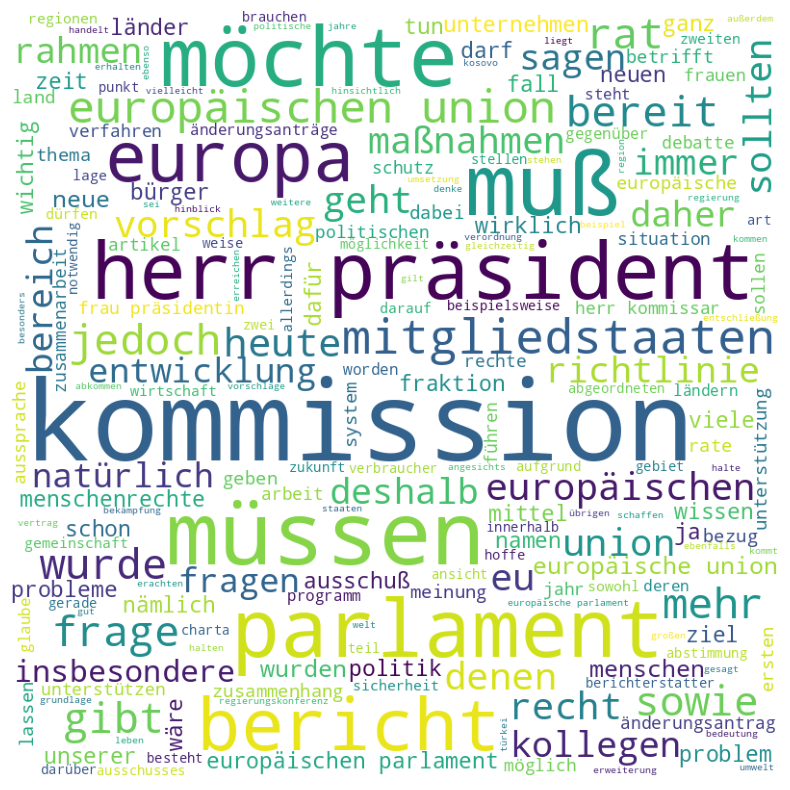

In [ ]:
comment_words = ''
stopwords = stopwords.words('german') #set(STOPWORDS)

#iterating through each file in directory
for i in tqdm(range(0,total_sequences)):
  
  tokens=train_raw_German[i].split()

  # Converts each token into lowercase
  for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

100%|██████████| 45500/45500 [00:00<00:00, 143877.82it/s]


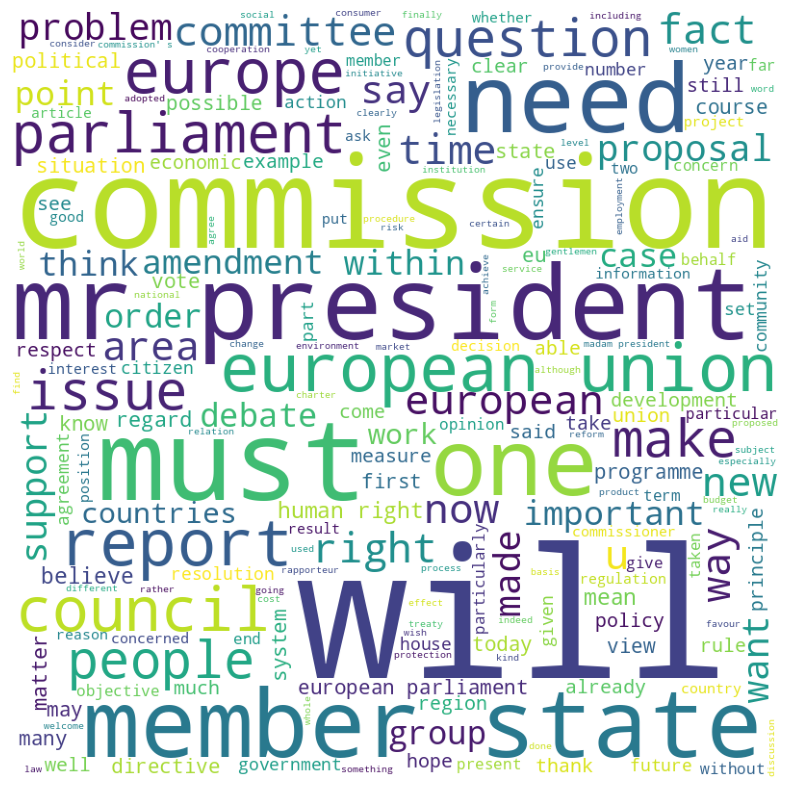

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

#iterating through each file in directory
for i in tqdm(range(0,total_sequences)):
  
  tokens=train_raw_English[i].split()

  # Converts each token into lowercase
  for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Commission** & **Kommision** are the most frequent words in the English & German Corpus respectively.

##v. Treemaps : Squarify

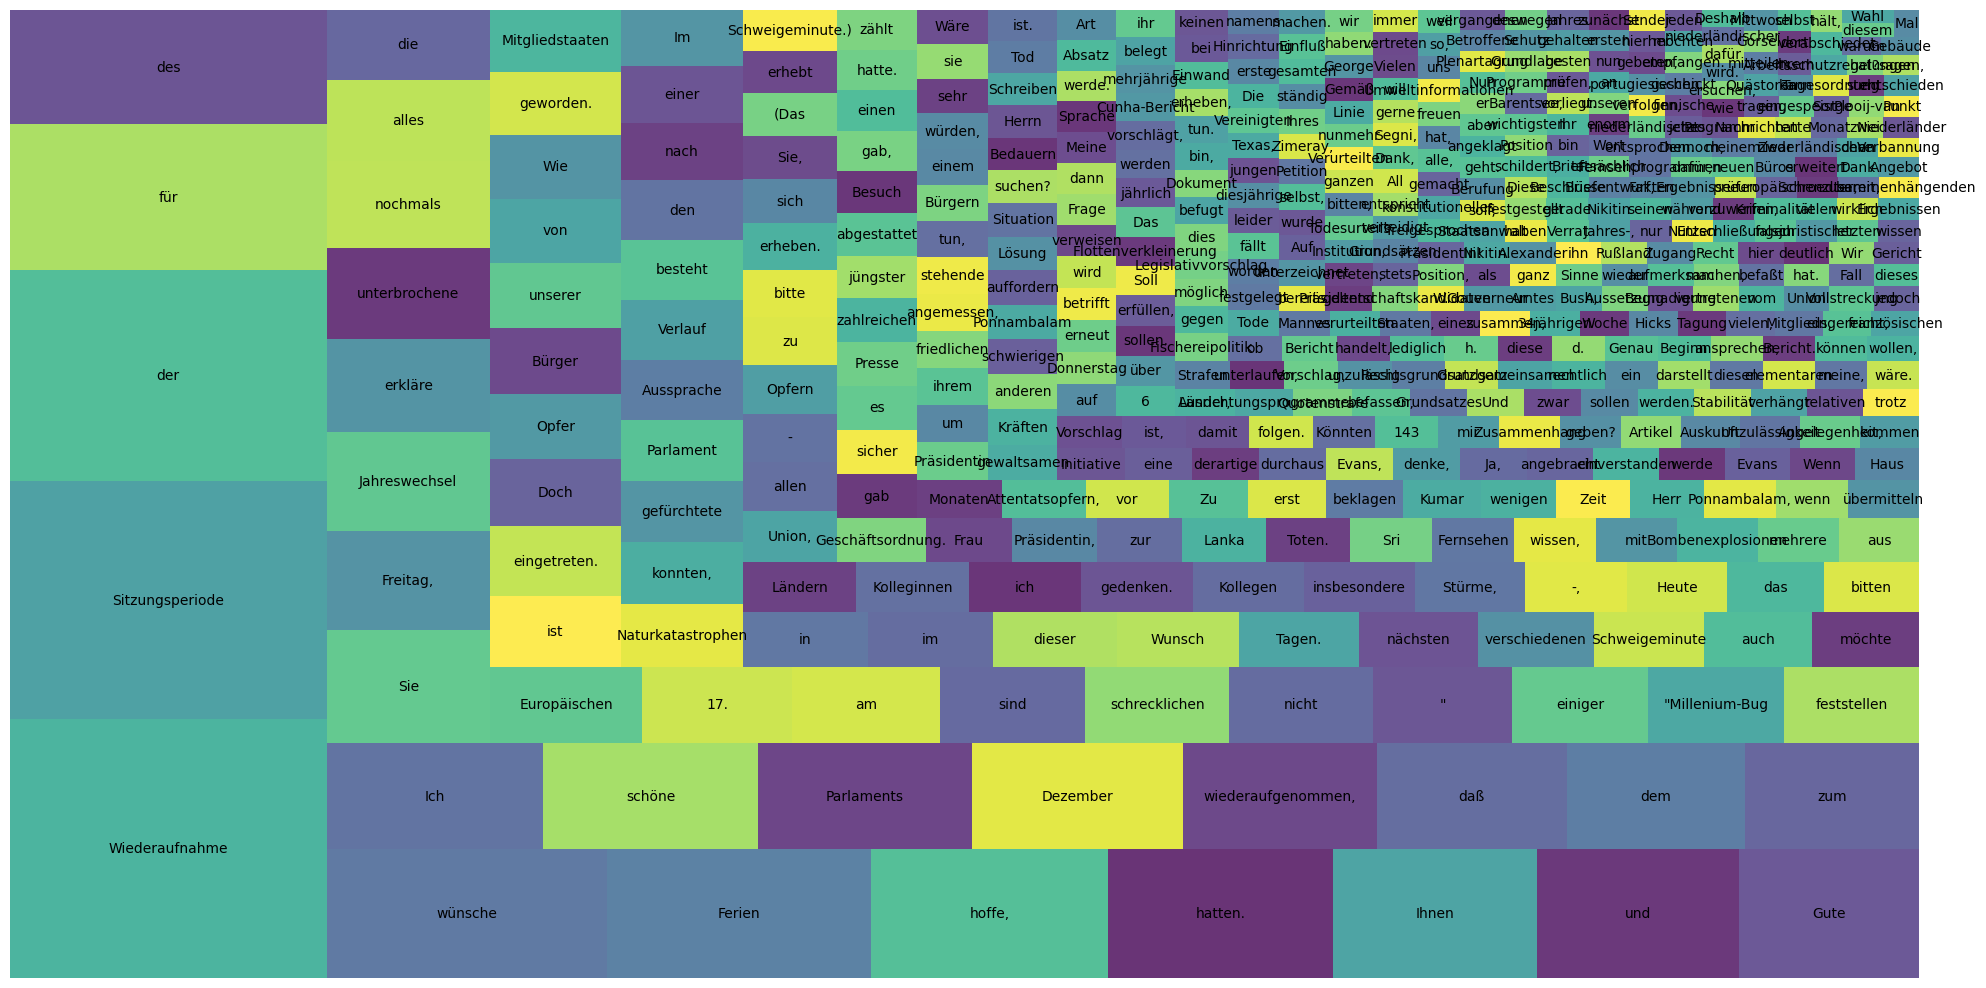

In [ ]:
# plot it
squarify.plot(sizes=df_raw_German_vocab_sorted[:500]['frequency'], label=df_raw_German_vocab[:500]['term'], alpha=.8 )
plt.axis('off')
plt.show()

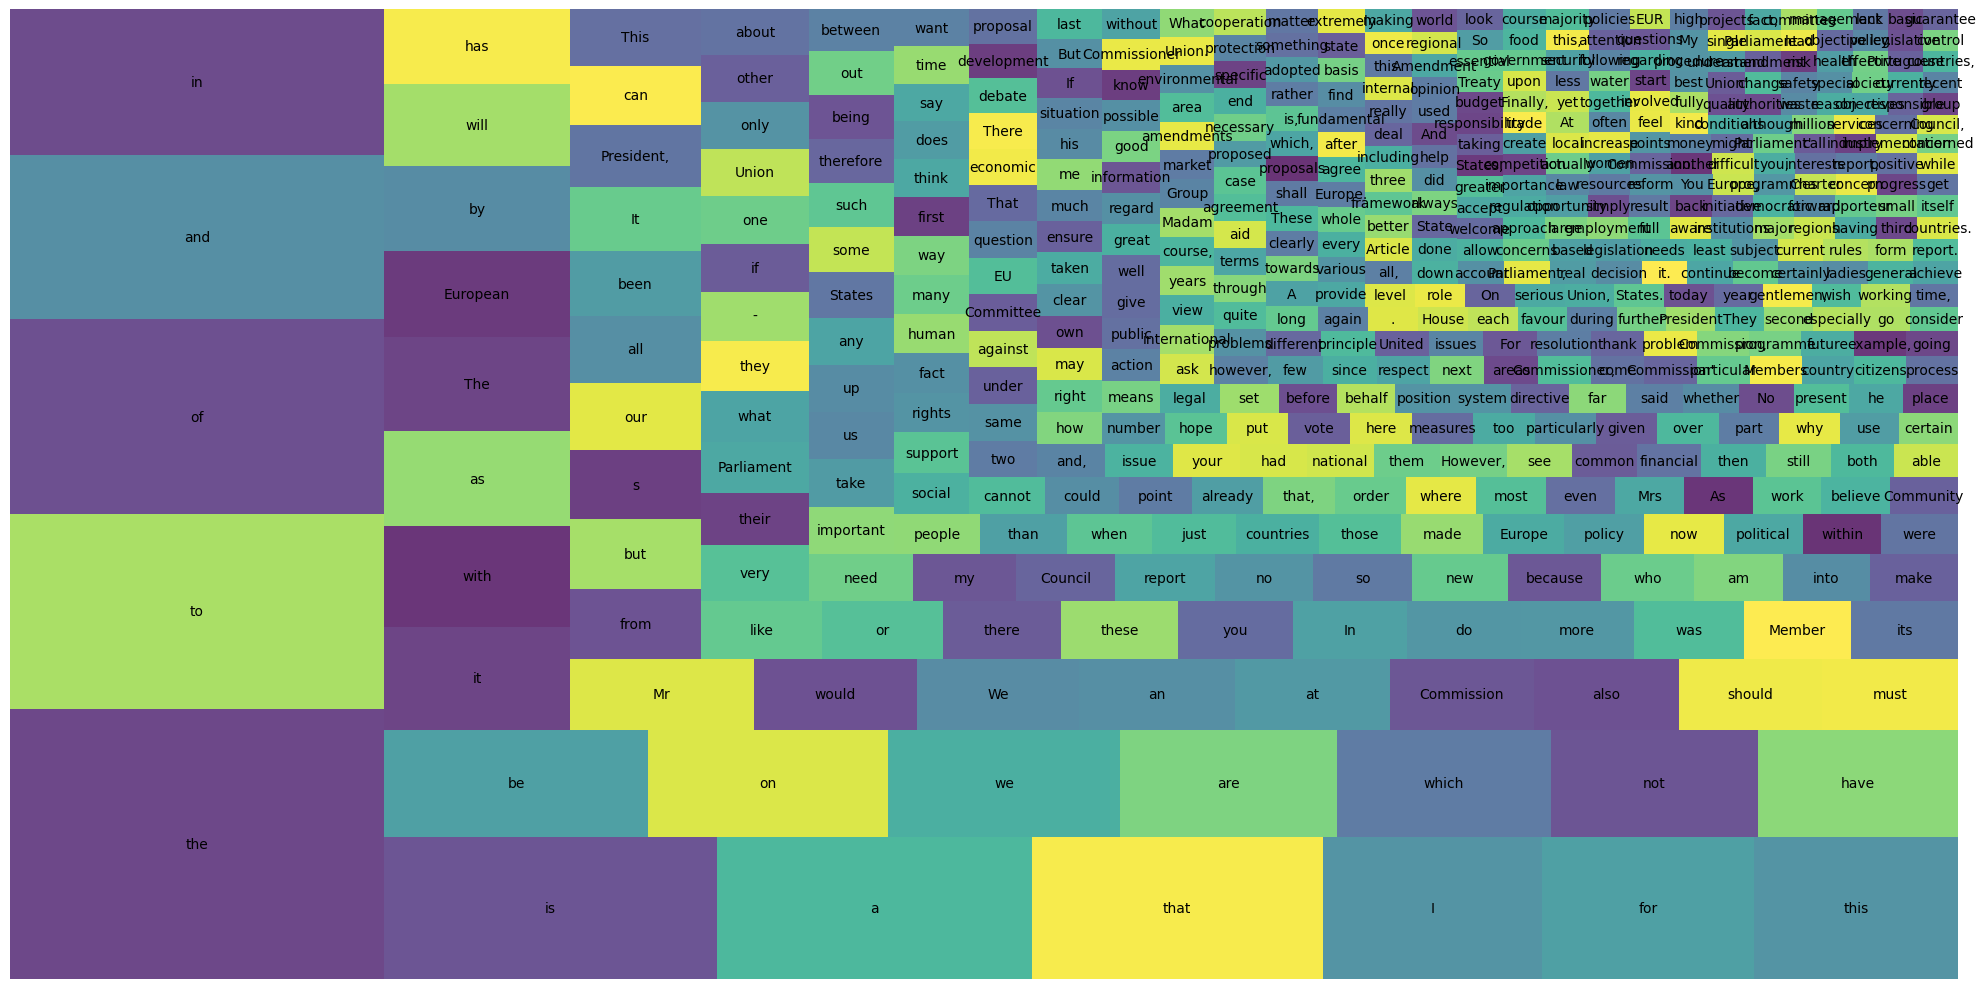

In [ ]:
# plot it

squarify.plot(sizes=df_raw_English_vocab_sorted[:500]['frequency'], label=df_raw_English_vocab_sorted[:500]['term'], alpha=.8 )
plt.axis('off')
plt.show()